In [4]:
import pandas as pd # type: ignore
import matplotlib.pyplot as plt # type: ignore
import random

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

random.seed(42)

path_to_raw = '../data/raw/'
path_to_processed = '../data/processed/'


### Display Head of original Dataset

In [5]:
original_verbatim = path_to_raw + 'verbatim.txt'
# original_verbatim_data = pd.read_csv(original_verbatim, delimiter='\t', low_memory=False)
# original_verbatim_df = pd.DataFrame(original_verbatim_data)
# selected_slice = original_verbatim_df[['gbifID', 'scientificName', 'taxonID']]
# selected_slice.head(10)

### convert and slice occurences.txt

In [6]:
occurrence_file = path_to_raw + 'occurrence.txt'
# occurrence_data =  pd.read_csv(occurrence_file, delimiter='\t', low_memory=False)

In [7]:
# df_occurrence = pd.DataFrame(occurrence_data)
# selected_slice = df_occurrence[['gbifID', 'level0Name', 'level1Name', 'references']]
# # selected_slice.to_csv('BA_DATASETS/DS1/processed_datasetV1/occurrence.csv', index=False)
# df_occurrence

### convert and slice verbatim.txt

In [8]:
verbatim_file = path_to_raw + 'verbatim.txt'
# verbatim_data =  pd.read_csv(verbatim_file, delimiter='\t', low_memory=False)

In [9]:
# df_verbatim = pd.DataFrame(verbatim_data)
# selected_slice = df_verbatim[['gbifID', 'eventDate', 'country', 'stateProvince', 'decimalLatitude', 'decimalLongitude', 'scientificName', 'higherClassification']]
# selected_slice.to_csv('BA_DATASETS/DS1/processed_datasetV1/verbatim.csv', index=False)

### convert and slice multimedia.txt

In [10]:
multimedia_file = path_to_raw + 'multimedia.txt'
# multimedia_data =  pd.read_csv(multimedia_file, delimiter='\t', low_memory=False)

In [11]:
# df_multimedia = pd.DataFrame(multimedia_data)
# selected_slice = df_verbatim[['gbifID', 'format', 'identifier']]
# selected_slice.to_csv('BA_DATASETS/DS1/processed_datasetV1/multimedia.csv', index=False)
# df_multimedia

# analyzing target variable

In [12]:
verbatim_file = path_to_processed + 'single_csv/verbatim.csv'
data = pd.read_csv(verbatim_file, low_memory=False)

In [13]:
data.head()

,gbifID,eventDate,country,stateProvince,decimalLatitude,decimalLongitude,scientificName,higherClassification
0,4888478881,2017-10-16,Spain,Huesca,42.141713,0.362053,Petrophora convergata,Animalia|Geometridae
1,4888478983,2024-04-08,Germany,Nordrhein-Westfalen,50.798703,6.139380,Aglais io,Animalia|Nymphalidae
2,2844302871,2018-06-17,Germany,Rheinland-Pfalz,49.820400,6.920900,Pyrausta despicata,Animalia|Crambidae
3,4888479068,2018-06-17,Spain,Girona,42.247835,2.910465,Maniola jurtina,Animalia|Nymphalidae
4,4888479085,2018-06-30,Spain,Castellón,40.637359,-0.340129,Pyrausta despicata,Animalia|Crambidae


In [14]:
data['scientificName'].describe()

count             3674060
unique               7664
top       Pararge aegeria
freq                75939
Name: scientificName, dtype: object

In [15]:
species_counts = data['scientificName'].value_counts()
for max in [10000, 5000, 4000, 3000, 2000, 1000]: print(f'Amount of different species with more than {max} occurrences: {len(species_counts[species_counts > max])}')

Amount of different species with more than 10000 occurrences: 76
Amount of different species with more than 5000 occurrences: 166
Amount of different species with more than 4000 occurrences: 208
Amount of different species with more than 3000 occurrences: 277
Amount of different species with more than 2000 occurrences: 387
Amount of different species with more than 1000 occurrences: 589


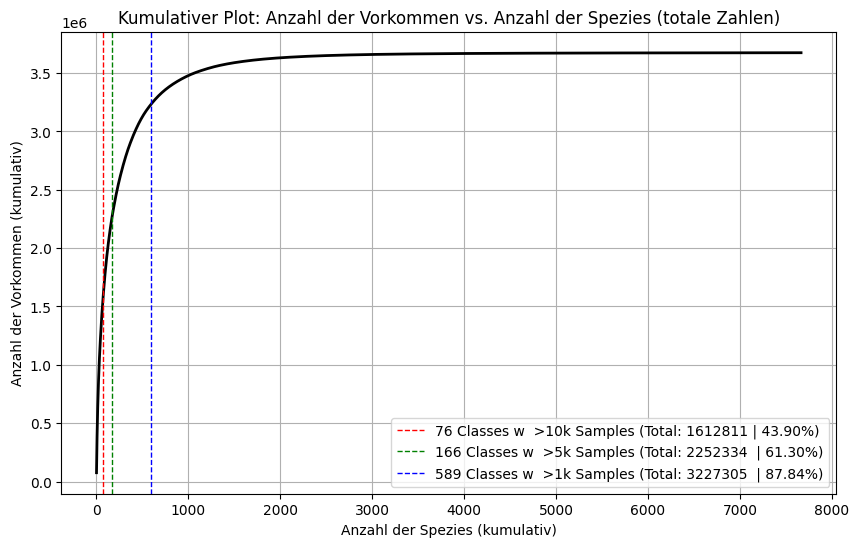

In [ ]:
species_counts_sorted = species_counts.sort_values(ascending=False)
cumulative_occurrences = species_counts_sorted.cumsum()
cumulative_species = range(1, len(species_counts_sorted) + 1)

plt.figure(figsize=(10, 6))
plt.plot(cumulative_species, cumulative_occurrences, color='black', lw=2)
plt.axvline(x=76, color='r', lw=1, linestyle='--', 
            label=f'76 Classes w  >10k Samples (Total: {cumulative_occurrences.iloc[75]} | {100*cumulative_occurrences.iloc[75]/cumulative_occurrences.iloc[-1]:.2f}%)')
plt.axvline(x=166, color='g', lw=1, linestyle='--', 
            label=f'166 Classes w  >5k Samples (Total: {cumulative_occurrences.iloc[166]}  | {100*cumulative_occurrences.iloc[166]/cumulative_occurrences.iloc[-1]:.2f}%)')
plt.axvline(x=589, color='b', lw=1, linestyle='--', 
            label=f'589 Classes w  >1k Samples (Total: {cumulative_occurrences.iloc[588]}  | {100*cumulative_occurrences.iloc[588]/cumulative_occurrences.iloc[-1]:.2f}%)')

plt.title('Kumulativer Plot: Anzahl der Vorkommen vs. Anzahl der Spezies (totale Zahlen)')
plt.xlabel('Anzahl der Spezies (kumulativ)')
plt.ylabel('Anzahl der Vorkommen (kumulativ)')
plt.legend()
plt.grid(True)
plt.show()

### Download for starting test-data-set (top20x50):
- 20 species with most occurrences
- 50 images per species
- 1000 images in total
- each image can be identified through gbifID

In [17]:
species_for_ds = species_counts.head(20).keys()
species_for_ds

Index(['Pararge aegeria', 'Vanessa atalanta', 'Noctua pronuba', 'Aglais io',
       'Lycaena phlaeas', 'Polyommatus icarus', 'Autographa gamma',
       'Pieris napi', 'Maniola jurtina', 'Pieris rapae', 'Polygonia c-album',
       'Cydalima perspectalis', 'Coenonympha pamphilus', 'Aglais urticae',
       'Gonepteryx rhamni', 'Peribatodes rhomboidaria', 'Araschnia levana',
       'Celastrina argiolus', 'Camptogramma bilineata', 'Vanessa cardui'],
      dtype='object', name='scientificName')

In [33]:
gbifID_blacklist = [1966132886, 4459520332] # seed hinzufügen bei random sampeling?, gbifID blacklist
selected_species = species_counts.head(20).keys()
selected_data = {'gbifID': [], 'scientificName': []}

for species in selected_species:
    species_ids = data[data['scientificName'] == species]['gbifID'].tolist()

    valid_species_ids = [id for id in species_ids if id not in gbifID_blacklist]
    
    if len(valid_species_ids) >= 50:
        selected = random.sample(species_ids, 50)
    
    # Füge die ausgewählten IDs zur Liste hinzu
    for gbifID in selected:
        selected_data['gbifID'].append(gbifID)
        selected_data['scientificName'].append(species)


selected_df = pd.DataFrame(selected_data)



In [34]:
output_file = path_to_processed + 'testing_datasetV2.csv'
# selected_df.to_csv(output_file, index=False)

### Full (unprocessed) Dataset of all species with more than 1000 Samples
- roughly 3.2 million samples
- 589 most common species
- each image can be identified through gbifID

In [35]:
selected_species = species_counts.head(589).keys()
selected_data = {'gbifID': [], 'scientificName': []}

for species in selected_species:
    species_ids = data[data['scientificName'] == species]['gbifID'].tolist()
    
    for gbifID in species_ids:
        selected_data['gbifID'].append(gbifID)
        selected_data['scientificName'].append(species)


selected_df = pd.DataFrame(selected_data)

print(selected_df.shape)
selected_df.head(5)



(3227305, 2)


,gbifID,scientificName
0,4888674839,Pararge aegeria
1,4888993245,Pararge aegeria
2,4889363161,Pararge aegeria
3,4889424824,Pararge aegeria
4,4889425249,Pararge aegeria


In [ ]:
output_file = path_to_processed + 'full_dataset_top589.csv'
# selected_df.to_csv(output_file, index=False)